#1 Описание данных

Данные для были взяты отсюда – https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

Данные представляют собой набор показателей здоровья и результатов опроса (всего 15 признаков). В качестве зависимой переменной выступает бинарная величина TenYearCHD — которая кодирует факт о том, заболеет ли человек коронарными болезнями сердца в течение 10 лет (кодировка “1”), или нет (кодировка “0”).

Задача исследования — определить, какие факторы влияют на вероятность возникновения болезней сердца.

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("readr", repos='http://cran.us.r-project.org')
install.packages("dplyr", repos='http://cran.us.r-project.org')
install.packages("ggplot2", repos='http://cran.us.r-project.org')
install.packages("tidyr", repos='http://cran.us.r-project.org')
install.packages("gridExtra", repos="http://cran.us.r-project.org")
install.packages("tidyverse", repos='http://cran.us.r-project.org')

# Загрузка библиотек
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(gridExtra)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/Rtmp1cMZCz/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/Rtmp1cMZCz/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/Rtmp1cMZCz/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-libr

In [3]:
%%R
heart_raw <- read.csv("framingham.csv")
str(heart_raw)


'data.frame':	4238 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


#2 Предобработка данных
Количество наблюдений в датасете, а именно 4238, позволяет нам безболезненно исключить наблюдения с пропущенными значениями.

Некоторые признаки имеют бинарную природу и закодированы с помощью 0 и 1. Их необходимо сделать факторами.

In [4]:
%%R
# Проверка на пропущенные значения (NA) по каждому столбцу
colSums(is.na(heart_raw))

# Удаление строк с хотя бы одним пропущенным значением
heart <- na.omit(heart_raw)

# Преобразование бинарных и категориальных переменных в факторный тип
heart$male            <- as.factor(heart$male)             # Пол (0 = женщина, 1 = мужчина)
heart$education       <- as.factor(heart$education)        # Уровень образования (категориальный)
heart$currentSmoker   <- as.factor(heart$currentSmoker)    # Курит ли в данный момент (0/1)
heart$BPMeds          <- as.factor(heart$BPMeds)           # Принимает ли лекарства от давления (0/1)
heart$prevalentHyp    <- as.factor(heart$prevalentHyp)     # Гипертония (0/1)
heart$prevalentStroke <- as.factor(heart$prevalentStroke)  # Был ли инсульт (0/1)
heart$diabetes        <- as.factor(heart$diabetes)         # Диабет (0/1)


Пробуем построить модель в лоб.

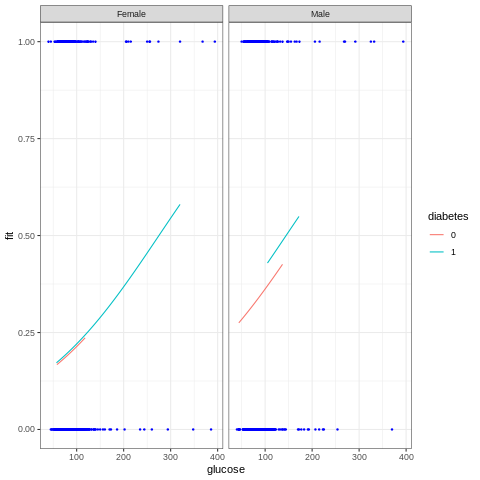

In [5]:
%%R
# 1. Построение логистической регрессии на всех признаках
mod_classic <- glm(TenYearCHD ~ ., data = heart, family = "binomial")

# 2. Создание набора новых данных для предсказаний
new_data_classic <- heart %>%
  group_by(male, education, currentSmoker, BPMeds, prevalentHyp, prevalentStroke, diabetes) %>%  # группируем по бинарным/категориальным переменным
  do(data.frame(
    glucose = seq(min(.$glucose), max(.$glucose), length.out = 100),  # 100 значений глюкозы от min до max
    age = mean(.$age),              # усредненные значения остальных переменных
    totChol = mean(.$totChol),
    sysBP = mean(.$sysBP),
    diaBP = mean(.$diaBP),
    BMI = mean(.$BMI),
    heartRate = mean(.$heartRate),
    cigsPerDay = mean(.$cigsPerDay)
  ))

# 3. Предсказание вероятности CHD для новых данных
new_data_classic$fit <- predict(mod_classic, newdata = new_data_classic, type = "response")  # type = "response" возвращает вероятности

# 4. Фильтрация результатов: оставляем только нужные группы
res <- new_data_classic %>%
  filter(currentSmoker == 1,           # только курящие
         prevalentHyp == 1,           # с гипертонией
         prevalentStroke == 0,        # без инсульта
         education == 1,              # уровень образования = 1
         BPMeds == 0)                 # без препаратов от давления

# 5. Подписи для осей по полу
male_labs <- c("Female", "Male")      # человекочитаемые подписи
names(male_labs) <- c("0", "1")       # соответствие значениям фактора male

# 6. Построение графика зависимости вероятности CHD от уровня глюкозы
ggplot(res, aes(x = glucose, y = fit)) +
  geom_line(aes(group = diabetes, color = diabetes)) +          # линии для групп с/без диабета
  facet_wrap(~ male, ncol = 2, labeller = labeller(male = male_labs)) +  # по полу (муж/жен)
  geom_point(data = heart, aes(x = glucose, y = TenYearCHD),    # исходные наблюдения
             size = 0.5, color = 'blue') +
  theme_bw()                                                    # черно-белая тема


По результатам не понятно какая переменная отложена по оси OY, и тем более, модель предсказывает отрицательные значения.

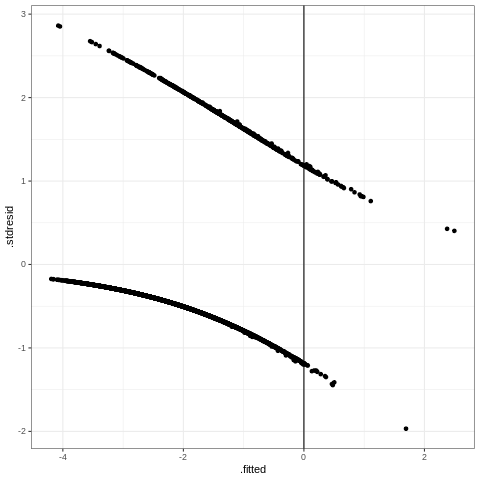

In [6]:
%%R
# Преобразуем модель mod_classic в датафрейм с диагностическими переменными
mod_classic_diag <- fortify(mod_classic)  # добавляет .fitted (предсказания) и .stdresid (стандартизованные остатки)

# Строим график остатков от предсказанных значений
ggplot(mod_classic_diag, aes(x = .fitted, y = .stdresid)) +  # ось X: предсказанные значения; ось Y: стандартизованные остатки
  geom_point() +               # добавляем точки (каждая точка — одно наблюдение)
  geom_vline(xintercept = 0) + # добавляем вертикальную линию при x = 0 для ориентира
  theme_bw()                   # применяем минималистичную черно-белую тему оформления


#3 Подбор логистической модели

3.1 Полная модель
Подберем логистическую регрессию средствами R. Построение модели по принципу backward selection (помните, что это такое?) всегда начинается с полной модели. Однако она редко (почти никогда) бывает оптимальной.

In [7]:
%%R
# Строим логистическую регрессию на всех переменных из таблицы heart
mod <- glm(TenYearCHD ~ .,                 # зависимая переменная — TenYearCHD; ~ . означает "все остальные переменные как предикторы"
           family = binomial(link = 'logit'),  # используем логистическую регрессию (биномиальная семья, логит-ссылка)
           data = heart)                   # используем датафрейм heart как источник данных

# Выполняем анализ отклонений (аналог ANOVA для GLM)
anova(mod, test = "Chisq")

Analysis of Deviance Table

Model: binomial, link: logit

Response: TenYearCHD

Terms added sequentially (first to last)


                Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                             3655     3120.5              
male             1   30.567      3654     3090.0 3.225e-08 ***
age              1  206.285      3653     2883.7 < 2.2e-16 ***
education        3    4.503      3650     2879.2 0.2119826    
currentSmoker    1   10.172      3649     2869.0 0.0014263 ** 
cigsPerDay       1    9.552      3648     2859.4 0.0019969 ** 
BPMeds           1   11.763      3647     2847.7 0.0006043 ***
prevalentStroke  1    2.556      3646     2845.1 0.1098858    
prevalentHyp     1   40.631      3645     2804.5 1.839e-10 ***
diabetes         1   10.323      3644     2794.2 0.0013135 ** 
totChol          1    5.752      3643     2788.4 0.0164699 *  
sysBP            1   24.835      3642     2763.6 6.246e-07 ***
diaBP            1    0.485      3641     2763.1 0.4860398

#3.2 Поиск оптимальной модели
Для тестирования логистической регрессии применяется Хи-квадрат тест. Критерием для отбора выберем AIC (информационный критерий Акаике).

In [8]:
%%R
drop1(mod, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + 
    BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + 
    sysBP + diaBP + BMI + heartRate + glucose
                Df Deviance    AIC    LRT  Pr(>Chi)    
<none>               2751.9 2787.9                     
male             1   2775.7 2809.7 23.830 1.052e-06 ***
age              1   2839.1 2873.1 87.227 < 2.2e-16 ***
education        3   2755.1 2785.1  3.223  0.358462    
currentSmoker    1   2752.1 2786.1  0.213  0.644739    
cigsPerDay       1   2760.2 2794.2  8.259  0.004055 ** 
BPMeds           1   2752.4 2786.4  0.489  0.484306    
prevalentStroke  1   2753.9 2787.9  1.959  0.161634    
prevalentHyp     1   2754.8 2788.8  2.847  0.091562 .  
diabetes         1   2751.9 2785.9  0.007  0.933748    
totChol          1   2756.3 2790.3  4.353  0.036934 *  
sysBP            1   2768.3 2802.3 16.414 5.089e-05 ***
diaBP            1   2752.3 2786.3  0.403  0.525384    
BMI 

In [9]:
%%R
# Обновляем модель: создаём новую модель mod1, исключив переменную education
mod1 <- update(mod, . ~ . - education)
# Проверяем, какие переменные можно удалить дальше (хи-квадрат тест)
drop1(mod1, test = "Chi")

Single term deletions

Model:
TenYearCHD ~ male + age + currentSmoker + cigsPerDay + BPMeds + 
    prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + 
    diaBP + BMI + heartRate + glucose
                Df Deviance    AIC    LRT  Pr(>Chi)    
<none>               2755.1 2785.1                     
male             1   2781.1 2809.1 26.008 3.400e-07 ***
age              1   2852.3 2880.3 97.136 < 2.2e-16 ***
currentSmoker    1   2755.3 2783.3  0.207  0.649478    
cigsPerDay       1   2763.4 2791.4  8.238  0.004103 ** 
BPMeds           1   2755.6 2783.6  0.448  0.503321    
prevalentStroke  1   2757.1 2785.1  1.984  0.158987    
prevalentHyp     1   2758.0 2786.0  2.835  0.092204 .  
diabetes         1   2755.2 2783.2  0.019  0.891789    
totChol          1   2759.1 2787.1  3.995  0.045647 *  
sysBP            1   2772.2 2800.2 17.114 3.519e-05 ***
diaBP            1   2755.6 2783.6  0.515  0.473137    
BMI              1   2755.5 2783.5  0.402  0.525934    
heartRate       

In [10]:
%%R
# Шаг: исключаем переменную currentSmoker из предыдущей модели mod1
mod2 <- update(mod1, . ~ . - currentSmoker)

# Применяем хи-квадрат тест для оценки значимости оставшихся переменных
drop1(mod2, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + BPMeds + prevalentStroke + 
    prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + 
    heartRate + glucose
                Df Deviance    AIC    LRT  Pr(>Chi)    
<none>               2755.3 2783.3                     
male             1   2781.3 2807.3 25.961 3.484e-07 ***
age              1   2852.3 2878.3 96.975 < 2.2e-16 ***
cigsPerDay       1   2777.4 2803.4 22.102 2.586e-06 ***
BPMeds           1   2755.8 2781.8  0.449  0.502840    
prevalentStroke  1   2757.3 2783.3  1.975  0.159878    
prevalentHyp     1   2758.2 2784.2  2.825  0.092796 .  
diabetes         1   2755.3 2781.3  0.018  0.894034    
totChol          1   2759.3 2785.3  3.969  0.046347 *  
sysBP            1   2772.5 2798.5 17.190 3.382e-05 ***
diaBP            1   2755.9 2781.9  0.532  0.465735    
BMI              1   2755.7 2781.7  0.343  0.558098    
heartRate        1   2755.9 2781.9  0.523  0.469752    
glucose          1   2765.8 2791

In [11]:
%%R
# Шаг: исключаем переменную diabetes из предыдущей модели mod2
mod3 <- update(mod2, . ~ . - diabetes)

# Применяем хи-квадрат тест для оценки значимости оставшихся переменных
drop1(mod3, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + BPMeds + prevalentStroke + 
    prevalentHyp + totChol + sysBP + diaBP + BMI + heartRate + 
    glucose
                Df Deviance    AIC    LRT  Pr(>Chi)    
<none>               2755.3 2781.3                     
male             1   2781.4 2805.4 26.019 3.381e-07 ***
age              1   2852.5 2876.5 97.151 < 2.2e-16 ***
cigsPerDay       1   2777.4 2801.4 22.086 2.607e-06 ***
BPMeds           1   2755.8 2779.8  0.452   0.50157    
prevalentStroke  1   2757.3 2781.3  1.973   0.16014    
prevalentHyp     1   2758.2 2782.2  2.832   0.09241 .  
totChol          1   2759.3 2783.3  3.976   0.04614 *  
sysBP            1   2772.6 2796.6 17.201 3.362e-05 ***
diaBP            1   2755.9 2779.9  0.538   0.46330    
BMI              1   2755.7 2779.7  0.355   0.55136    
heartRate        1   2755.9 2779.9  0.524   0.46931    
glucose          1   2774.2 2798.2 18.793 1.457e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01

In [12]:
%%R
# Шаг: исключаем переменную BPMeds (приём лекарств от давления) из модели mod3
mod4 <- update(mod3, . ~ . - BPMeds)

# Проверяем значимость остальных переменных с помощью хи-квадрат теста
drop1(mod4, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + prevalentStroke + prevalentHyp + 
    totChol + sysBP + diaBP + BMI + heartRate + glucose
                Df Deviance    AIC    LRT  Pr(>Chi)    
<none>               2755.8 2779.8                     
male             1   2781.6 2803.6 25.785 3.816e-07 ***
age              1   2853.1 2875.1 97.281 < 2.2e-16 ***
cigsPerDay       1   2777.9 2799.9 22.090 2.602e-06 ***
prevalentStroke  1   2758.0 2780.0  2.211   0.13703    
prevalentHyp     1   2758.8 2780.8  3.044   0.08104 .  
totChol          1   2759.9 2781.9  4.072   0.04360 *  
sysBP            1   2773.9 2795.9 18.133 2.060e-05 ***
diaBP            1   2756.4 2778.4  0.564   0.45246    
BMI              1   2756.2 2778.2  0.373   0.54119    
heartRate        1   2756.4 2778.4  0.567   0.45142    
glucose          1   2774.7 2796.7 18.870 1.399e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [13]:
%%R
# Шаг: исключаем переменную BMI (индекс массы тела) из модели mod4
mod5 <- update(mod4, . ~ . - BMI)

# Проверяем значимость оставшихся переменных с помощью хи-квадрат теста
drop1(mod5, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + prevalentStroke + prevalentHyp + 
    totChol + sysBP + diaBP + heartRate + glucose
                Df Deviance    AIC    LRT  Pr(>Chi)    
<none>               2756.2 2778.2                     
male             1   2782.2 2802.2 26.012 3.392e-07 ***
age              1   2853.4 2873.4 97.234 < 2.2e-16 ***
cigsPerDay       1   2778.0 2798.0 21.781 3.056e-06 ***
prevalentStroke  1   2758.4 2778.4  2.260   0.13277    
prevalentHyp     1   2759.4 2779.4  3.203   0.07350 .  
totChol          1   2760.3 2780.3  4.125   0.04225 *  
sysBP            1   2774.3 2794.3 18.130 2.064e-05 ***
diaBP            1   2756.6 2776.6  0.422   0.51604    
heartRate        1   2756.7 2776.7  0.553   0.45716    
glucose          1   2775.4 2795.4 19.247 1.148e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [14]:
%%R
# Шаг: исключаем переменную diaBP (диастолическое давление) из модели mod5
mod6 <- update(mod5, . ~ . - diaBP)

# Проверяем значимость оставшихся переменных в модели mod6 с помощью хи-квадрат теста
drop1(mod6, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + prevalentStroke + prevalentHyp + 
    totChol + sysBP + heartRate + glucose
                Df Deviance    AIC     LRT  Pr(>Chi)    
<none>               2756.6 2776.6                      
male             1   2782.2 2800.2  25.593 4.216e-07 ***
age              1   2861.4 2879.4 104.828 < 2.2e-16 ***
cigsPerDay       1   2778.7 2796.7  22.058 2.646e-06 ***
prevalentStroke  1   2758.8 2776.8   2.219   0.13629    
prevalentHyp     1   2759.5 2777.5   2.924   0.08726 .  
totChol          1   2760.7 2778.7   4.130   0.04214 *  
sysBP            1   2781.9 2799.9  25.346 4.791e-07 ***
heartRate        1   2757.2 2775.2   0.594   0.44071    
glucose          1   2776.2 2794.2  19.645 9.324e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [15]:
%%R
# Шаг: исключаем переменную heartRate (частота сердечных сокращений) из модели mod6
mod7 <- update(mod6, . ~ . - heartRate)

# Проверяем значимость оставшихся переменных в модели mod7 с помощью хи-квадрат теста
drop1(mod7, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + prevalentStroke + prevalentHyp + 
    totChol + sysBP + glucose
                Df Deviance    AIC     LRT  Pr(>Chi)    
<none>               2757.2 2775.2                      
male             1   2784.1 2800.1  26.881 2.163e-07 ***
age              1   2863.9 2879.9 106.669 < 2.2e-16 ***
cigsPerDay       1   2778.7 2794.7  21.496 3.545e-06 ***
prevalentStroke  1   2759.5 2775.5   2.285   0.13061    
prevalentHyp     1   2760.0 2776.0   2.786   0.09507 .  
totChol          1   2761.2 2777.2   3.969   0.04633 *  
sysBP            1   2782.0 2798.0  24.805 6.343e-07 ***
glucose          1   2776.4 2792.4  19.176 1.192e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [16]:
%%R
# Шаг: исключаем переменную prevalentStroke (наличие инсульта в анамнезе) из модели mod7
mod8 <- update(mod7, . ~ . - prevalentStroke)

# Проверяем значимость оставшихся переменных в модели mod8 с помощью хи-квадрат теста
drop1(mod8, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + prevalentHyp + totChol + 
    sysBP + glucose
             Df Deviance    AIC     LRT  Pr(>Chi)    
<none>            2759.5 2775.5                      
male          1   2786.5 2800.5  27.016 2.017e-07 ***
age           1   2867.1 2881.1 107.621 < 2.2e-16 ***
cigsPerDay    1   2780.6 2794.6  21.098 4.365e-06 ***
prevalentHyp  1   2762.5 2776.5   2.997   0.08341 .  
totChol       1   2763.4 2777.4   3.943   0.04708 *  
sysBP         1   2784.5 2798.5  24.982 5.787e-07 ***
glucose       1   2778.7 2792.7  19.222 1.164e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [17]:
%%R
# Шаг: исключаем переменную prevalentHyp (наличие гипертонии) из модели mod8
mod9 <- update(mod8, . ~ . - prevalentHyp)

# Проверяем значимость оставшихся переменных в модели mod9 с помощью хи-квадрат теста
drop1(mod9, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + totChol + sysBP + glucose
           Df Deviance    AIC     LRT  Pr(>Chi)    
<none>          2762.5 2776.5                      
male        1   2790.3 2802.3  27.800 1.345e-07 ***
age         1   2871.7 2883.7 109.240 < 2.2e-16 ***
cigsPerDay  1   2783.3 2795.3  20.793 5.118e-06 ***
totChol     1   2766.5 2778.5   4.051   0.04415 *  
sysBP       1   2829.2 2841.2  66.744 3.091e-16 ***
glucose     1   2781.4 2793.4  18.906 1.373e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [18]:
%%R
# Шаг: создаём модель mod2, исключив переменную currentSmoker (признак, курит ли человек сейчас) из модели mod1
mod2 <- update(mod1, . ~ . - currentSmoker)

# Проверяем значимость оставшихся переменных в модели mod2 с помощью хи-квадрат теста
drop1(mod2, test = "Chi")


Single term deletions

Model:
TenYearCHD ~ male + age + cigsPerDay + BPMeds + prevalentStroke + 
    prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + 
    heartRate + glucose
                Df Deviance    AIC    LRT  Pr(>Chi)    
<none>               2755.3 2783.3                     
male             1   2781.3 2807.3 25.961 3.484e-07 ***
age              1   2852.3 2878.3 96.975 < 2.2e-16 ***
cigsPerDay       1   2777.4 2803.4 22.102 2.586e-06 ***
BPMeds           1   2755.8 2781.8  0.449  0.502840    
prevalentStroke  1   2757.3 2783.3  1.975  0.159878    
prevalentHyp     1   2758.2 2784.2  2.825  0.092796 .  
diabetes         1   2755.3 2781.3  0.018  0.894034    
totChol          1   2759.3 2785.3  3.969  0.046347 *  
sysBP            1   2772.5 2798.5 17.190 3.382e-05 ***
diaBP            1   2755.9 2781.9  0.532  0.465735    
BMI              1   2755.7 2781.7  0.343  0.558098    
heartRate        1   2755.9 2781.9  0.523  0.469752    
glucose          1   2765.8 2791

Сравним AIC для всех стадий отбора модели. Видим, что с удалением предикторов AIC уменьшается, что хорошо.

In [20]:
%%R
AIC(mod, mod1, mod2, mod3, mod4, mod5, mod6, mod7, mod8, mod9)


     df      AIC
mod  18 2787.905
mod1 15 2785.128
mod2 14 2783.335
mod3 13 2781.353
mod4 12 2779.804
mod5 11 2778.178
mod6 10 2776.600
mod7  9 2775.194
mod8  8 2775.479
mod9  7 2776.476


#4 Диагностика модели
Прежде чем переходить к интерпретации модели, необходимо проверить её корректность.

4.1 Проверка на линейность
Линейность связи почти в порядке (немного завышен хвост, но не критично).

`geom_smooth()` using formula = 'y ~ x'


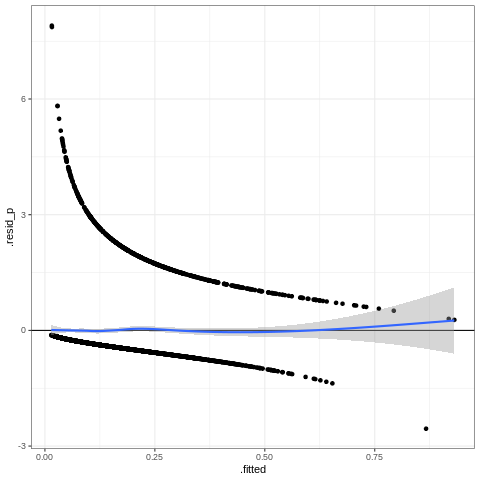

In [22]:
%%R
# Создаём датафрейм с предсказанными значениями и остатками модели mod9
mod9_diag <- data.frame(
  .fitted = fitted(mod9, type = "response"),   # предсказанные вероятности (от 0 до 1)
  .resid_p = resid(mod9, type = "pearson")     # остатки Пирсона (оценка ошибки)
)

# Строим график остатков Пирсона против предсказанных значений
ggplot(mod9_diag, aes(y = .resid_p, x = .fitted)) +
  geom_point() +                       # добавляем точки (каждое наблюдение)
  theme_bw() +                         # применяем черно-белую тему
  geom_hline(yintercept = 0) +        # горизонтальная линия y = 0 — идеальный случай
  geom_smooth(method = 'loess')       # добавляем сглаженную кривую тренда (локальная регрессия)


#5 Проверка на сверхдисперсию
Используем авторскую функцию для проверки на сверхдисперсию. Всё в порядке.

In [23]:
%%R
# Функция для проверки на сверхдисперсию (основана на остатках Пирсона)
overdisp_fun <- function(model) {
  rdf <- df.residual(model)  # Количество степеней свободы модели (n - p)

  # Корректировка для модели с отрицательным биномиальным распределением
  if (any(class(model) == "negbin")) rdf <- rdf - 1

  # Расчёт остатков Пирсона
  rp <- residuals(model, type = "pearson")

  # Вычисление суммы квадратов остатков
  Pearson.chisq <- sum(rp^2)

  # Отношение суммы квадратов остатков к числу степеней свободы
  prat <- Pearson.chisq / rdf

  # p-value по хи-квадрат распределению
  pval <- pchisq(Pearson.chisq, df = rdf, lower.tail = FALSE)

  # Возврат результатов как вектор
  c(chisq = Pearson.chisq, ratio = prat, rdf = rdf, p = pval)
}

# Применение к модели mod9
overdisp_fun(mod9)


       chisq        ratio          rdf            p 
3670.8713682    1.0059938 3649.0000000    0.3961557 


#6 Интерпретация коэффициентов модели
Наша итоговая модель выглядит так:

TenYearCHD = -9.13 + 0.561*male1 + 0.066*age + 0.019*cigsPerDay + 0.002*totChol + 0.017*sysBP + 0.007*glucose + E

b0 (intercept) — логарифм отношения шансов для базового уровня дискретного фактора

b1 (male1) — на сколько единиц изменяется логарифм отношения шансов (logit) для данного уровня дискретного фактора по сравнению с базовым уровнем

b2–b5 — на сколько единиц изменяется логарифм отношения шансов (logit), если значение предиктора изменяется на единицу

#6.1 Трактовка нашей модели
Отношение шансов заболеть, если вы мужчина, в
𝑒
0.56
=
1.75
e
0.56
 =1.75 раза выше, чем если вы женщина.

При увеличении числа выкуренных сигарет в день на единицу отношение шансов заболеть увеличится в
𝑒
0.019
=
1.02
e
0.019
 =1.02 раза. Чем больше сигарет — тем выше риски.

И так далее со всеми непрерывными предикторами.

#7 Предсказания модели
#7.1 Искусственный датасет
Создадим искусственный датасет, в котором будет 200 наблюдений (по 100 на каждый пол). Значения всех предикторов будут равны их средним, кроме предиктора cigsPerDay. Он будет принимать значения от минимума до максимума по выборке.



In [24]:
%%R
# Создаём новый искусственный датафрейм new_data
# Для каждого пола (male = 0 или 1) варьируем cigsPerDay от минимума до максимума
# Остальные переменные фиксируем на среднем уровне
new_data <- heart %>%
  group_by(male) %>%  # группируем по полу (0 — женщина, 1 — мужчина)
  do(data.frame(
    cigsPerDay = seq(from = min(.$cigsPerDay), to = max(.$cigsPerDay), length.out = 10),  # создаём 10 значений от мин до макс
    age = mean(.$age),         # фиксируем среднее значение возраста
    totChol = mean(.$totChol), # средний уровень холестерина
    sysBP = mean(.$sysBP),     # среднее систолическое давление
    glucose = mean(.$glucose)  # средний уровень глюкозы
  ))


#7.2 Предсказания в матричном виде
На основе искусственного датасета и нашей модели сделаем предсказания.

In [25]:
%%R
## Предсказания модели при помощи операций с матрицами

# 1. Строим модельную матрицу X и извлекаем вектор коэффициентов b
X <- model.matrix(~ male + age + cigsPerDay + totChol + sysBP + glucose, data = new_data)
b <- coef(mod9)

# 2. Предсказанные значения в масштабе линейного предиктора (логит)
new_data$fit_eta <- X %*% b  # логит-предсказания

# 3. Стандартная ошибка для каждого логита
new_data$se_eta <- sqrt(diag(X %*% vcov(mod9) %*% t(X)))

# 4. Функция для обратной логит-трансформации (преобразование из логита в вероятность)
logit_back <- function(x) exp(x) / (1 + exp(x))

# 5. Предсказанные вероятности (логит-преобразованные значения)
new_data$fit_pi <- logit_back(new_data$fit_eta)

# 6. Границы доверительного интервала (± 2 стандартные ошибки, в масштабе вероятности)
new_data$lwr_pi <- logit_back(new_data$fit_eta - 2 * new_data$se_eta)
new_data$upr_pi <- logit_back(new_data$fit_eta + 2 * new_data$se_eta)

# 7. Просмотр первых двух строк результата
head(new_data, 2)


# A tibble: 2 × 11
# Groups:   male [1]
  male  cigsPerDay   age totChol sysBP glucose fit_eta[,1] se_eta fit_pi[,1]
  <fct>      <dbl> <dbl>   <dbl> <dbl>   <dbl>       <dbl>  <dbl>      <dbl>
1 0           0     49.7    240.  133.    81.8       -2.38 0.0841     0.0851
2 0           4.78  49.7    240.  133.    81.8       -2.28 0.0795     0.0925
# ℹ 2 more variables: lwr_pi <dbl[,1]>, upr_pi <dbl[,1]>


#7.2.1 График предсказаний в масштабе функции связи

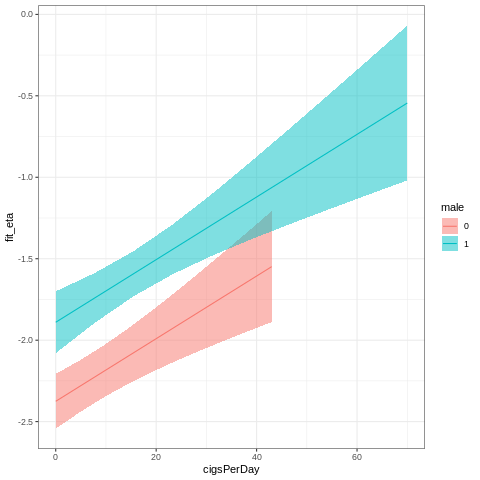

In [26]:
%%R
# Строим график логитов (предсказаний в масштабе функции связи)
ggplot(new_data, aes(x = cigsPerDay, y = fit_eta, fill = male)) +
  geom_line(aes(color = male)) +  # линия логита для каждого пола
  geom_ribbon(                    # полоса доверительного интервала (±2 SE)
    aes(ymin = fit_eta - 2 * se_eta,
        ymax = fit_eta + 2 * se_eta),
    alpha = 0.5                   # прозрачность ленты
  ) +
  theme_bw()                      # чёрно-белая тема оформления


#7.2.2 График предсказаний в масштабе отклика

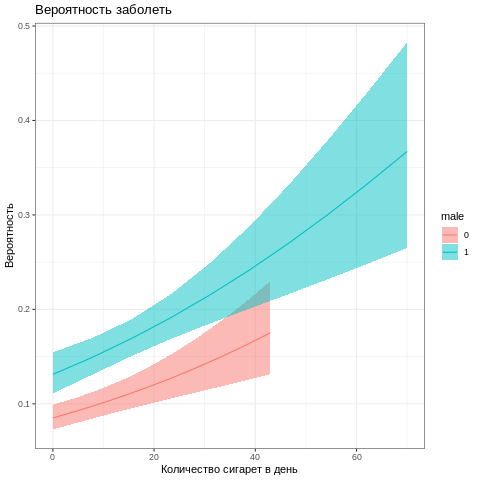

In [27]:
%%R
# Строим график предсказанных вероятностей заболевания
ggplot(new_data, aes(x = cigsPerDay, y = fit_pi, fill = male)) +

  # Добавляем доверительную полосу (интервалы 95%)
  geom_ribbon(aes(ymin = lwr_pi, ymax = upr_pi), alpha = 0.5) +

  # Добавляем линии предсказания для каждого пола (цвет — по male)
  geom_line(aes(color = male)) +

  # Подписываем оси и заголовок графика
  labs(
    y = 'Вероятность',
    x = 'Количество сигарет в день',
    title = 'Вероятность заболеть'
  ) +

  # Применяем аккуратную черно-белую тему
  theme_bw()
